<a href="https://colab.research.google.com/github/singhawat29/SCIP513_Deep_Learning/blob/master/HW2_6537710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time

#ข้อ1

##ข้อ1.4

In [3]:
x = np.linspace(0, 1, 20)

In [4]:
y = np.cos(2*np.pi*x)*np.exp(-x)

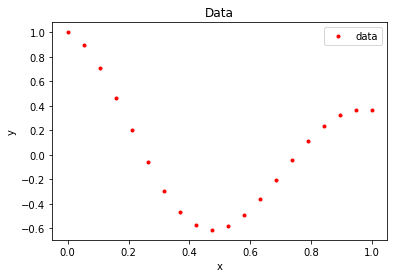

In [11]:
plt.plot(x,y,'.r',label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend(loc='upper right')

##ข้อ1.5

In [12]:
def sig(x):
 return 1/(1 + np.exp(-x))
def dsig(x):
 return sig(x)*(1-sig(x))

In [13]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w = m[0]
  b = m[1]
  v = m[2]
  alpha = w*x+b
  lamda = v*sig(alpha)-y
  dLbydw = (2/n)* (sum(lamda*v*dsig(alpha)*x))
  dLbydb = (2/n)* (sum(lamda*v*dsig(alpha)))
  dLbydv = (2/n)* (sum(lamda*sig(alpha)))
  return np.array([dLbydw,dLbydb,dLbydv])

In [14]:
# loss function
def loss(m,x,y,n):
  w = m[0]
  b = m[1]
  v = m[2]
  alpha = w*x+b
  e = abs( v*sig(alpha)-y)
  return (1/n)*np.sum(e*e)

In [ ]:
m0 = np.random.randn(3)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[ 0.0686136   0.16733869 -0.41916496]


0.4214330580187145

[ 1.58761547 -0.78672592 -1.17827059]
0.6305547062547565
0.6299909807307431
0.6294283839481156
0.628866912960515
0.6283065648309458
0.6277473366317405
0.6271892254445263
0.6266322283601897
0.6260763424788433
0.6255215649097914
0.6249678927714957
0.6244153231915429
0.6238638533066093
0.6233134802624289
0.6227642012137595
0.6222160133243495
0.6216689137669047
0.6211228997230562
0.6205779683833261
0.6200341169470971
0.6194913426225782
0.6189496426267724
0.6184090141854462
0.6178694545330958
0.6173309609129153
0.6167935305767657
0.6162571607851428
0.6157218488071456
0.615187591920445
0.6146543874112527
0.6141222325742887
0.6135911247127523
0.6130610611382896
0.6125320391709643
0.6120040561392249
0.611477109379876
0.6109511962380471
0.610426314067162
0.6099024602289096
0.6093796320932133
0.608857827038201
0.6083370424501755
0.6078172757235847
0.607298524260992
0.6067807854730474
0.6062640567784573
0.6057483356039562
0.6052336193842772
0.6047199055621232
0.6042071915881371
0.6036954749208755

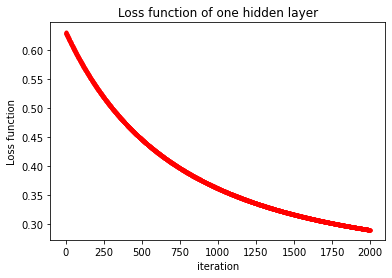

m= [ 1.44452355 -1.07330074 -0.479874  ]


In [ ]:
m0 = np.random.randn(3)
s = 0.001
print(m0)
for i in range(2000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function of one hidden layer')
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

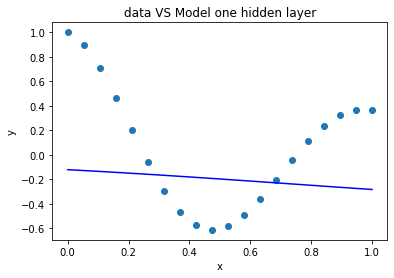

In [ ]:
w = m[0]
b = m[1]
v = m[2]
y1 = v*sig(w*x+b)
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model one hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##tensorflow

Epoch 1/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.9957
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.7440
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5893
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4886
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4203
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3722
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 9/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 12/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 13/1000
20/20 [====

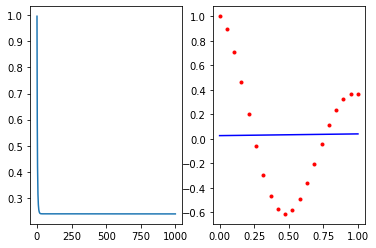

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1, use_bias=False))
model.compile(loss='mse', optimizer='sgd')
h = model.fit(x,y,epochs=1000,batch_size=1)
model.summary()
plt.subplot(121)
plt.plot(h.epoch,h.history['loss'])
yp = model(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#ข้อ2

##2.4

In [ ]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w1 = m[0]
  b1 = m[1]
  v1 = m[2]
  w2 = m[3]
  b2 = m[4]
  v2 = m[5]
  alpha = w1*x+b1
  gamma = w2*x+b2
  lamda = v1*sig(alpha)+v2*sig(gamma)-y
  dLbydw1 = (2/n)* (sum(lamda*v1*dsig(alpha)*x))
  dLbydb1 = (2/n)* (sum(lamda*v1*dsig(alpha)))
  dLbydv1 = (2/n)* (sum(lamda*sig(alpha)))
  dLbydw2 = (2/n)* (sum(lamda*v2*dsig(gamma)*x))
  dLbydb2 = (2/n)* (sum(lamda*v2*dsig(gamma)))
  dLbydv2 = (2/n)* (sum(lamda*sig(gamma)))
  return np.array([dLbydw1,dLbydb1,dLbydv1,dLbydw2,dLbydb2,dLbydv2])

In [ ]:
# loss function
def loss(m,x,y,n):
 w1 = m[0]
 b1 = m[1]
 v1 = m[2]
 w2 = m[3]
 b2 = m[4]
 v2 = m[5]
 alpha = w*x+b
 gamma = w2*x+b2
 e = abs( v1*sig(alpha)+v2*sig(gamma)-y)
 return (1/n)*np.sum(e*e)

In [ ]:
m0 = np.random.randn(6)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[0.05001692 0.07677042 0.09629802 0.00471386 0.00761102 0.17858718]


0.457329747312992

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
0.234708980082432
0.2347084483924128
0.23470791657587606
0.23470738463277319
0.23470685256305546
0.23470632036667416
0.2347057880435807
0.23470525559372646
0.23470472301706266
0.2347041903135407
0.23470365748311195
0.2347031245257276
0.23470259144133918
0.23470205822989781
0.23470152489135507
0.23470099142566206
0.23470045783277027
0.234699924112631
0.23469939026519548
0.23469885629041515
0.23469832218824133
0.23469778795862528
0.23469725360151839
0.23469671911687198
0.23469618450463725
0.23469564976476565
0.23469511489720862
0.23469457990191725
0.23469404477884295
0.23469350952793713
0.234692974149151
0.23469243864243589
0.2346919030077432
0.23469136724502415
0.23469083135423016
0.23469029533531247
0.2346897591882225
0.23468922291291136
0.23468868650933056
0.23468814997743134
0.23468761331716506
0.23468707652848297
0.23468653961133645
0.23468600256567684
0.23468546539145532
0.2346849280886233
0.23468439065713206
0.23468385309693

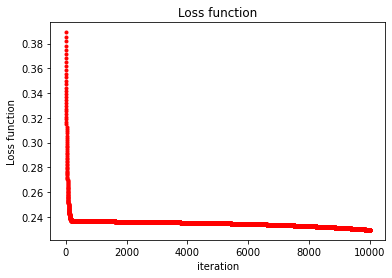

m= [-0.31384209  0.56481281 -0.42210877 -1.44843718  0.12775988  0.85030357]


In [ ]:
m0 = np.random.randn(6)
s = 0.01
print(m0)
for i in range(10000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function')
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

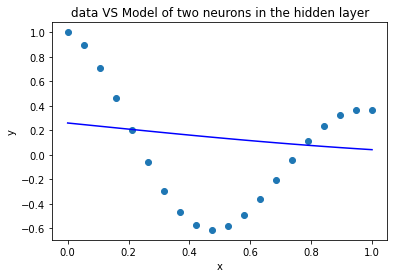

In [ ]:
w1 = m[0]
b1 = m[1]
v1 = m[2]
w2 = m[3]
b2 = m[4]
v2 = m[5]
alpha = w*x+b
gamma = w2*x+b2
y1 = v1*sig(alpha)+v2*sig(gamma)
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two neurons in the hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##tensorflow

Epoch 1/100
20/20 [==============================] - 1s 33ms/step - loss: 0.3200
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2574
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2343
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2307
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 13/100
20/20 [================

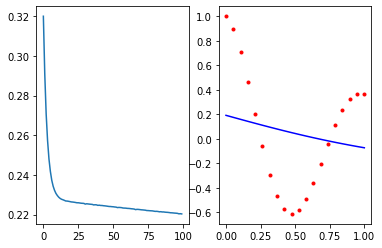

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(1, use_bias=False))
model.compile(loss='mse', optimizer='sgd')
h = model.fit(x,y,epochs=100,batch_size=1)
model.summary()
plt.subplot(121)
plt.plot(h.epoch,h.history['loss'])
yp = model(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#ข้อ3

##ข้อ3.4

In [ ]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w1 = m[0]
  b1 = m[1]
  w2 = m[2]
  b2 = m[3]
  v = m[4]
  alpha = w1*x+b1
  h1 = sig(alpha)
  gamma = w2*h1+b2
  h2 = sig(gamma)
  lamda = v*h2-y
  dLbydw1 = (2/n)* (sum(lamda*v*dsig(gamma)*w2*dsig(alpha)*x))
  dLbydb1 = (2/n)* (sum(lamda*v*dsig(gamma)*w2*dsig(alpha)))
  dLbydw2 = (2/n)* (sum(lamda*v*dsig(gamma)*h1))
  dLbydb2 = (2/n)* (sum(lamda*v*dsig(gamma)))
  dLbydv = (2/n)* (sum(lamda*h2))
  return np.array([dLbydw1,dLbydb1,dLbydw2,dLbydb2,dLbydv])

In [ ]:
# loss function
def loss(m,x,y,n):
 w1 = m[0]
 b1 = m[1]
 w2 = m[2]
 b2 = m[3]
 v = m[4]
 alpha = w1*x+b1
 h1 = sig(alpha)
 gamma = w2*h1+b2
 h2 = sig(gamma)
 e = abs( v*h2-y)
 return (1/n)*np.sum(e*e)

In [ ]:
m0 = np.random.randn(5)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[-0.01027313 -0.01966059  0.46629101  0.70588958  1.23173829]


1.1657575769967243

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
0.23676204448171176
0.23676204445079302
0.23676204441987433
0.2367620443889555
0.23676204435803672
0.2367620443271179
0.23676204429619907
0.23676204426528022
0.2367620442343613
0.2367620442034423
0.2367620441725234
0.2367620441416044
0.23676204411068544
0.2367620440797664
0.23676204404884726
0.2367620440179281
0.23676204398700906
0.23676204395608993
0.23676204392517072
0.2367620438942514
0.23676204386333222
0.23676204383241295
0.23676204380149368
0.23676204377057433
0.23676204373965498
0.23676204370873563
0.23676204367781623
0.2367620436468968
0.23676204361597739
0.23676204358505784
0.23676204355413835
0.23676204352321886
0.2367620434922992
0.23676204346137958
0.23676204343046
0.23676204339954032
0.23676204336862072
0.23676204333770096
0.23676204330678124
0.23676204327586148
0.23676204324494168
0.2367620432140219
0.236762043183102
0.23676204315218216
0.23676204312126226
0.23676204309034232
0.23676204305942236
0.23676204302850237


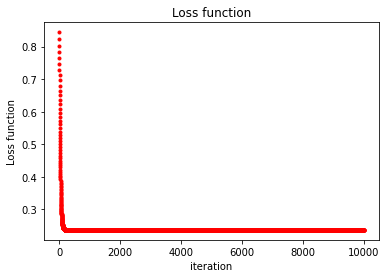

m= [-0.83492848 -0.35017481  0.33252778  2.45003904  0.05318616]


In [ ]:
m0 = np.random.randn(5)
s = 0.01
print(m0)
for i in range(1000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function')
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

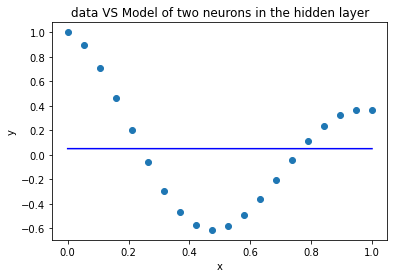

In [ ]:
w1 = m[0]
b1 = m[1]
w2 = m[2]
b2 = m[3]
v = m[4]
alpha = w1*x+b1
h1 = sig(alpha)
gamma = w2*h1+b2
h2 = sig(gamma)
y1 = v*h2
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two neurons in the hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[ 0.61147406 -0.02791447  0.1596557  -0.70423396 -2.03660578]
epoch= 0
l epoch = 0.8110827658455753
epoch= 1
l epoch = 0.8019463783611624
epoch= 2
l epoch = 0.7930551911324842
epoch= 3
l epoch = 0.7844003737385896
epoch= 4
l epoch = 0.7759734844011358
epoch= 5
l epoch = 0.7677664501778259
epoch= 6
l epoch = 0.7597715482817731
epoch= 7
l epoch = 0.7519813884575409
epoch= 8
l epoch = 0.7443888963490783
epoch= 9
l epoch = 0.7369872977989533
epoch= 10
l epoch = 0.7297701040221928
epoch= 11
l epoch = 0.7227310976016859
epoch= 12
l epoch = 0.7158643192555235
epoch= 13
l epoch = 0.7091640553298207
epoch= 14
l epoch = 0.702624825973548
epoch= 15
l epoch = 0.6962413739546779
epoch= 16
l epoch = 0.6900086540795326
epoch= 17
l epoch = 0.6839218231796558
epoch= 18
l epoch = 0.6779762306327771
epoch= 19
l epoch = 0.6721674093865626
epoch= 20
l epoch = 0.6664910674558002
epoch= 21
l epoch = 0.6609430798655291
epoch= 22
l epoch = 0.6555194810143217
epoch= 23
l epoch = 0.6502164574335506
epoch= 24
l e

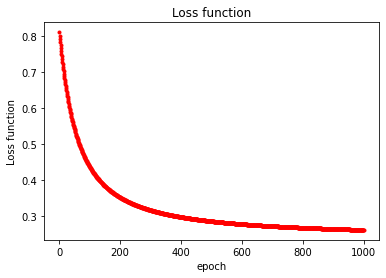

m= [ 0.62528912  0.01969043 -0.48967504 -1.88181642 -1.06920397]


In [ ]:
m0 = np.random.randn(5)
s = 0.01
batch_size = 5
n_data_set = n
itereation = int(n_data_set/batch_size)
print(m0)
f = 0
epoch = 1000
for ii in range(epoch+1):
  print("epoch=",ii)
  #print("m0 epoch =",m0)
  f = 0
  for i in range(itereation):
      e = f + batch_size
      g = grad(m0,x[f:e],y[f:e],n)
      m = m0 - s*g
      #print(loss(m,x,y,n))
      #print(m)
      m0 = m
      f = f + batch_size
      #print(m0)
      #plt.plot(i,loss(m,x,y,n),'.r')
  print("l epoch =",loss(m,x,y,n))
  plt.plot(ii,loss(m,x,y,n),'.r')

plt.title('Loss function')
plt.xlabel("epoch")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

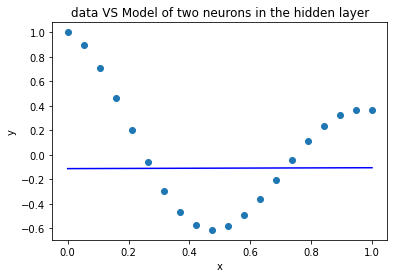

In [ ]:
w1 = m[0]
b1 = m[1]
w2 = m[2]
b2 = m[3]
v = m[4]
alpha = w1*x+b1
h1 = sig(alpha)
gamma = w2*h1+b2
h2 = sig(gamma)
y1 = v*h2
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two neurons in the hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##tensorflow

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.2434
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2430
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2428
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2428
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2423
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2421
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2417
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2415
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2415
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2412
Epoch 11/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2409
Epoch 12/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2414
Epoch 13/1000
4/4 [==============================

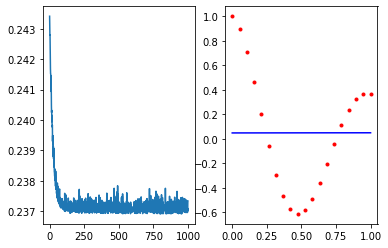

In [ ]:
from tensorflow.keras import Sequential, layers
model3 = Sequential()
model3.add(layers.Input(shape=(1,)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.add(layers.Dense(1, use_bias=False))
model3.compile(loss='mse', optimizer='sgd')
h3 = model3.fit(x,y,epochs=1000,batch_size=5)
model3.summary()
plt.subplot(121)
plt.plot(h3.epoch,h3.history['loss'])
yp = model3(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#extra

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 0.7630
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6232
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5028
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4038
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2987
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2612
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2579
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2590
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 13/500
4/4 [==============================] - 0s 4ms/st

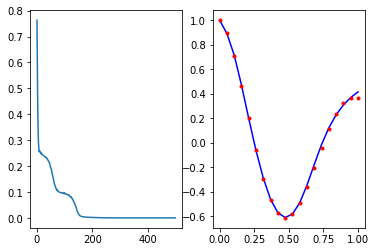

In [ ]:
from tensorflow.keras import Sequential, layers
model3 = Sequential()
model3.add(layers.Input(shape=(1,)))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(1, use_bias=False))
model3.compile(loss='mse', optimizer='adam')
h3 = model3.fit(x,y,epochs=500,batch_size=5)
model3.summary()
plt.subplot(121)
plt.plot(h3.epoch,h3.history['loss'])
yp = model3(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')